# Problem Statement

Consumer relationship management has become a hot trending for both providers and insurance companies looking to promote wellness and reduce long-term spending. In today’s competitive healthcare industry, consumers have a ton of options when it comes to choosing healthcare services. Hospitals, physician practices, and health systems are becoming more focused on improving the patient experience by offering convenience, functionality, and access that modern consumers expect. There are several questions to answer:

1. What are vital metrics hospitals should use to measure patient experience?
2. What predictive models hospitals should use to predict patient experience and satisfaction?
3. How would hospitals create meaningful care plans and keep patients engaged with their financial and clinical responsibilities by using behavioral patterns?
4. How to inform care management decisions and develop stronger, more motivational relationships between patients and providers to improve long-term engagement and reduce the risks associated with chronic diseases by using predictive analytics?

To answer those questions, I am going to launch this project, which is benefit for healthcare providers' decision-making and strategy-making process, to improve their service and enhance patients relationship.

# Objective

1. Develop a model to predict patient experience 
2. Looking for the key metrics for measuring and predicting patient experience 
3. Cluster analysis

# Dataset

To implement the goal, I am going to choose dataset from the Official US Government Site for Medicare: https://data.medicare.gov/, which provides me the hospital compare dataset and allow me to compare the quality of care at over 4,000 Medicare-certified hospitals across the country.

I choose 3 datasets on this website:

1. Hospital General Information: https://data.cms.gov/provider-data/dataset/xubh-q36u

  A list of all hospitals that have been registered with Medicare. The list includes addresses, phone numbers, hospital type, and overall hospital rating.

2. Unplanned Hospital Visits - Hospital：https://data.medicare.gov/Hospital-Compare/Unplanned-Hospital-Visits-Hospital/632h-zaca

  Unplanned Hospital Visits – provider data. This data set includes provider data for the hospital return days (or excess days in acute care [EDAC]) measures, the unplanned readmissions measures, and the result of unplanned hospital visits after an outpatient procedure.
  I choose "Rate of readmission for patients after discharge from the hospital (hospital-wide)" as measurement of readmission, the reason shows below:
  
  It is the overall rate of unplanned readmission after discharge from the hospital (also called “hospital-wide readmission”) focuses on whether patients who were discharged from a hospital stay were hospitalized again within 30 days. All medical, surgical and gynecological, neurological, cardiovascular, and cardiorespiratory hospital patients are included in this measure. Patients may have returned to the same hospital or to a different hospital. They may have been readmitted for a condition that is related to their recent hospital stay, or for an entirely different reason.
  It is the overall rate of unplanned readmission shows whether a hospital is doing its best to prevent complications, providing clear discharge instructions to patients, and helping to ensure patients make a smooth transition to their home or another setting like a nursing home.
  
3. Patient survey (HCAHPS) - Hospital: https://data.medicare.gov/Hospital-Compare/Patient-survey-HCAHPS-Hospital/dgck-syfz
  
  A list of hospital ratings for the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS). HCAHPS is a national, standardized survey of hospital patients about their experiences during a recent inpatient hospital stay.

# Data Cleaning

In [1]:
##1. Import Data and Packages
import os
import pandas as pd
from pandas import set_option
import numpy as np
import warnings
os.getcwd()
os.listdir('/Users/jiujunzhang/Desktop/HPE_dataset')
df1 = pd.read_csv('/Users/jiujunzhang/Desktop/HPE_dataset/Hospital_General_Information.csv')
df2 = pd.read_csv('/Users/jiujunzhang/Desktop/HPE_dataset/Unplanned_Hospital_Visits_-_Hospital.csv')
df3 = pd.read_csv('/Users/jiujunzhang/Desktop/HPE_dataset/Patient_survey__HCAHPS__-_Hospital.csv')

In [2]:
##2. Describe the data to see the structure
df1.head(2)

,Facility ID,State,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Same as the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,10005,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average


In [3]:
df2.head(2)

,Facility ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
0,10001,Hospital return days for heart attack patients,Average Days per 100 Discharges,620,7,-5.4,21.7
1,10001,Rate of emergency department (ED) visits for p...,No Different Than the National Rate,190,7.1,5,9.9


In [4]:
df3.head(2)

,Facility ID,HCAHPS Measure ID,HCAHPS Question,Patient Survey Star Rating
0,10001,H_HSP_RATING_9_10,Patients who gave their hospital a rating of 9...,Not Applicable
1,10001,H_QUIET_STAR_RATING,Quietness - star rating,4


In [5]:
## I choose to use the 'Rate of readmission after discharge from hospital (hospital-wide)' as an overall measure for readmission, extract this category from df2.
df2_new = df2[df2['Measure Name']=='Rate of readmission after discharge from hospital (hospital-wide)']

In [6]:
## Drop the column of df2: 'Measure Name'
df2_new.drop('Measure Name',axis = 'columns')

,Facility ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
8,10001,No Different Than the National Rate,4474,15.6,14,17.4
24,10005,No Different Than the National Rate,2018,15.9,13.8,18.1
39,10006,No Different Than the National Rate,3620,15.2,13.5,17.2
48,10007,No Different Than the National Rate,443,16.1,13.5,18.9
68,10008,No Different Than the National Rate,127,14.8,12.1,18
...,...,...,...,...,...,...
68233,52002F,No Different Than the National Rate,266,16.3,14.5,18.2
68238,52003F,Worse Than the National Rate,4362,20.3,16.8,21.2
68260,52004F,Worse Than the National Rate,2842,18.3,16.2,19.3
68273,53004F,No Different Than the National Rate,574,14.9,13.5,16.4


In [7]:
# Deal with df3
column_filters = {'HCAHPS Question': ['Quietness - star rating', 'Discharge information - star rating','Staff responsiveness - star rating','Cleanliness - star rating','Doctor communication - star rating','Communication about medicines - star rating','Nurse communication - star rating','Care transition - star rating' ]}
for k in column_filters.keys():
    column_filters[k] = '|'.join(column_filters[k])
column_filters

{'HCAHPS Question': 'Quietness - star rating|Discharge information - star rating|Staff responsiveness - star rating|Cleanliness - star rating|Doctor communication - star rating|Communication about medicines - star rating|Nurse communication - star rating|Care transition - star rating'}

In [8]:
df3_new = df3.loc[(df3['HCAHPS Question'].str.contains(column_filters['HCAHPS Question'], case=False))]

In [9]:
df3 = df3_new.pivot(index='Facility ID',columns='HCAHPS Question', values='Patient Survey Star Rating')
df3

HCAHPS Question,Care transition - star rating,Cleanliness - star rating,Communication about medicines - star rating,Discharge information - star rating,Doctor communication - star rating,Nurse communication - star rating,Quietness - star rating,Staff responsiveness - star rating
Facility ID,,,,,,,,
01014F,3,2,3,2,4,2,3,2
01019F,4,3,4,2,4,4,5,3
01021F,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
02013F,5,3,5,4,5,4,3,4
02014F,4,3,5,3,4,4,5,4
...,...,...,...,...,...,...,...,...
90004,4,3,3,4,3,3,2,3
90005,3,4,2,3,3,3,5,2
90008,1,1,1,1,1,1,1,1


In [10]:
df = df3.reset_index()
df

HCAHPS Question,Facility ID,Care transition - star rating,Cleanliness - star rating,Communication about medicines - star rating,Discharge information - star rating,Doctor communication - star rating,Nurse communication - star rating,Quietness - star rating,Staff responsiveness - star rating
0,01014F,3,2,3,2,4,2,3,2
1,01019F,4,3,4,2,4,4,5,3
2,01021F,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,02013F,5,3,5,4,5,4,3,4
4,02014F,4,3,5,3,4,4,5,4
...,...,...,...,...,...,...,...,...,...
4873,90004,4,3,3,4,3,3,2,3
4874,90005,3,4,2,3,3,3,5,2
4875,90008,1,1,1,1,1,1,1,1
4876,90011,2,2,3,3,2,2,2,2


In [11]:
## Merge datasets (df1,df2,df3,df4):
return1= pd.merge(df1,df2_new, how='outer', on='Facility ID')

In [12]:
## Then we can get our merged dataset:
dta = pd.merge(return1,df, how='outer', on='Facility ID')
dta

,Facility ID,State,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,...,Lower Estimate,Higher Estimate,Care transition - star rating,Cleanliness - star rating,Communication about medicines - star rating,Discharge information - star rating,Doctor communication - star rating,Nurse communication - star rating,Quietness - star rating,Staff responsiveness - star rating
0,10001,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Same as the national average,Below the national average,Below the national average,...,14,17.4,3,3,3,4,3,3,4,3
1,10005,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Same as the national average,Above the national average,Same as the national average,...,13.8,18.1,3,2,3,4,4,3,4,3
2,10006,AL,Acute Care Hospitals,Proprietary,Yes,2,Below the national average,Same as the national average,Above the national average,Below the national average,...,13.5,17.2,2,2,2,2,3,3,4,1
3,10007,AL,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,Below the national average,Same as the national average,Below the national average,Same as the national average,...,13.5,18.9,4,3,4,4,3,3,5,3
4,10008,AL,Acute Care Hospitals,Proprietary,Yes,4,Same as the national average,Not Available,Above the national average,Not Available,...,12.1,18,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,52002F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.5,18.2,4,4,5,3,2,4,4,4
5447,52003F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.8,21.2,4,3,4,3,4,4,4,4
5448,52004F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,19.3,5,4,5,5,4,5,3,4
5449,53004F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5,16.4,4,3,5,4,4,4,4,4


In [13]:
### Get rid of Value == 'Not Available'
for column in dta:
    index_names = dta[ (dta[column].values == 'Not Available' )].index 
    dta.drop(index_names, inplace = True)
dta

,Facility ID,State,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,...,Lower Estimate,Higher Estimate,Care transition - star rating,Cleanliness - star rating,Communication about medicines - star rating,Discharge information - star rating,Doctor communication - star rating,Nurse communication - star rating,Quietness - star rating,Staff responsiveness - star rating
0,10001,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Same as the national average,Below the national average,Below the national average,...,14,17.4,3,3,3,4,3,3,4,3
1,10005,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Same as the national average,Above the national average,Same as the national average,...,13.8,18.1,3,2,3,4,4,3,4,3
2,10006,AL,Acute Care Hospitals,Proprietary,Yes,2,Below the national average,Same as the national average,Above the national average,Below the national average,...,13.5,17.2,2,2,2,2,3,3,4,1
3,10007,AL,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,Below the national average,Same as the national average,Below the national average,Same as the national average,...,13.5,18.9,4,3,4,4,3,3,5,3
5,10011,AL,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,Same as the national average,Below the national average,Same as the national average,Below the national average,...,13.7,17.2,3,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,51005F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.5,18,3,2,4,3,2,4,2,3
5446,52002F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.5,18.2,4,4,5,3,2,4,4,4
5447,52003F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.8,21.2,4,3,4,3,4,4,4,4
5448,52004F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,19.3,5,4,5,5,4,5,3,4


In [14]:
## Get rid of Nan
dta_final = dta.dropna()

In [15]:
# Save the final dataframe to a csv file
dta_final.to_csv('/Users/jiujunzhang/Desktop/HPE_dataset/PatientExperience1.csv',sep='\t', encoding='utf-8', header='true')

Now, we finished the step of Clean Data, in the raw dataset, there are 5451 rows of value, after clean the data, we get our final dataframe with 2308 rows * 27 columns.

# Data Mining

In [53]:
# Import Packages and final Dataset
%matplotlib inline
import os
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from dmba                            import regressionSummary, classificationSummary
from sklearn.preprocessing           import StandardScaler
from sklearn.metrics                 import accuracy_score
# Plotting packages
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

import warnings
warnings.simplefilter(action='ignore')
df = pd.read_csv('/Users/jiujunzhang/Desktop/HPE_dataset/PatientExperience.csv')

# Data Visualization
This is a high level exporation of this dataset focusing on key data types (i.e. geography, readmissions information, Medicare spending, and hospital ownership and type).

Figure 1. High Patient Experience Rating Distribution by US State


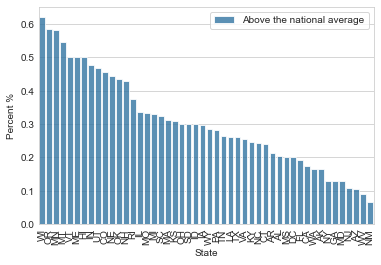

In [54]:
# Create a satifaction by region dataframe
sat_region = pd.DataFrame(df.groupby('State').Patient_experience.value_counts())
sat_region.columns.values[0] = 'Count'
sat_region = sat_region.reset_index()


# Format dataframe to calculate percent PS per region; this will help normalize the data for easier comparison
sat_region_percent_calc = sat_region.groupby('State').Count.sum()
sat_region_percent_calc = pd.DataFrame(sat_region_percent_calc)
sat_region_percent_calc.reset_index(inplace = True)
sat_region_percent_calc.head(2)

# Merge datasets
sat_region = pd.merge(sat_region, sat_region_percent_calc, left_on = 'State', right_on = 'State')
sat_region['percent'] = sat_region['Count_x'] /sat_region['Count_y']
sat_region3 = sat_region[(sat_region['Patient_experience'].values == 'Above the national average')]
sat_region3 = sat_region3.sort_values(by='percent', ascending=False)

# Display data as a barplot
sns.barplot(x = 'State', y = 'percent', hue = 'Patient_experience', data = sat_region3, alpha=0.8)
plt.legend(loc='upper right')
plt.xlabel('State')
plt.ylabel('Percent %')
plt.xticks(rotation = 90)
plt.style.context('seaborn-whitegrid')

print('Figure 1. High Patient Experience Rating Distribution by US State')
plt.savefig('Fig2.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

Figure 2. Top 10 Low Patient Experience by US State


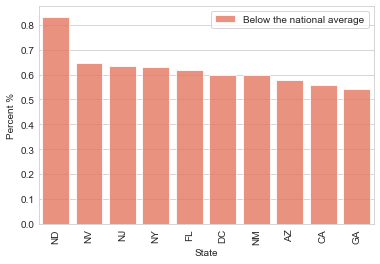

In [55]:
# Merge datasets
sat_region = pd.merge(sat_region, sat_region_percent_calc, left_on = 'State', right_on = 'State')
sat_region['percent'] = sat_region['Count_x'] /sat_region['Count_y']
sat_region1 = sat_region[(sat_region['Patient_experience'].values == 'Below the national average')]
sat_region1 = sat_region1.sort_values(by='percent', ascending=False)

# Display data as a barplot
sns.barplot(x = 'State', y = 'percent', hue = 'Patient_experience', data = sat_region1.head(10), alpha=0.8, palette ="Reds")
plt.legend(loc='upper right')
plt.xlabel('State')
plt.ylabel('Percent %')
plt.xticks(rotation = 90)
plt.style.context('seaborn-whitegrid')

print('Figure 2. Top 10 Low Patient Experience by US State')
plt.savefig('Fig4.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

* Quick Summary of Geography Information:
1. 
    

In [56]:
df['Mortality_national_comparison']= df['Mortality_national_comparison'].map({'Below the national average': 1, 'Same as the national average': 2, 'Above the national average':3})
df['Safety_of_care_national_comparison']= df['Safety_of_care_national_comparison'].map({'Below the national average': 1, 'Same as the national average': 2, 'Above the national average':3})
df['Readmission_national_comparison']= df['Readmission_national_comparison'].map({'Below the national average': 1, 'Same as the national average': 2, 'Above the national average':3})
df['Patient_experience']= df['Patient_experience'].map({'Below the national average': 1, 'Same as the national average': 2, 'Above the national average':3})
df['Effectiveness_of_care_national_comparison']= df['Effectiveness_of_care_national_comparison'].map({'Below the national average': 1, 'Same as the national average': 2, 'Above the national average':3})
df['Timeliness_of_care_national_comparison']= df['Timeliness_of_care_national_comparison'].map({'Below the national average': 1, 'Same as the national average': 2, 'Above the national average':3})
df['Efficient_use_of_medical_imaging_national_comparison']= df['Efficient_use_of_medical_imaging_national_comparison'].map({'Below the national average': 1, 'Same as the national average': 2, 'Above the national average':3})

In [57]:
df['Rate_of_readmission_after_discharge']= df['Rate_of_readmission_after_discharge'].map({'Worse Than the National Rate': 1, 'No Different Than the National Rate': 2, 'Better Than the National Rate':3})

In [58]:
df = df.drop('Unnamed: 0',axis = 'columns')
df

,Facility_ID,State,Hospital_Type,Hospital_Ownership,Emergency_Services,Hospital_overall_rating,Mortality_national_comparison,Safety_of_care_national_comparison,Readmission_national_comparison,Patient_experience,...,Lower_Estimate,Higher_Estimate,Care_transition,Cleanliness,Communication_about_medicines,Discharge_information,Doctor_communication,Nurse_communication,Quietness,Staff_responsiveness
0,10001,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,1,2,1,1,...,14.0,17.4,3,3,3,4,3,3,4,3
1,10005,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,1,2,3,2,...,13.8,18.1,3,2,3,4,4,3,4,3
2,10006,AL,Acute Care Hospitals,Proprietary,Yes,2,1,2,3,1,...,13.5,17.2,2,2,2,2,3,3,4,1
3,10007,AL,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,1,2,1,2,...,13.5,18.9,4,3,4,4,3,3,5,3
4,10011,AL,Acute Care Hospitals,Voluntary non-profit - Private,Yes,2,2,1,2,1,...,13.7,17.2,3,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,670085,TX,Acute Care Hospitals,Voluntary non-profit - Private,Yes,4,2,3,2,2,...,14.3,16.9,4,2,3,3,3,4,5,3
2304,670088,TX,Acute Care Hospitals,Voluntary non-profit - Private,Yes,4,2,1,2,3,...,14.7,17.0,4,3,3,3,4,4,4,3
2305,670098,TX,Acute Care Hospitals,Proprietary,Yes,4,2,2,3,3,...,15.3,17.8,3,3,4,3,3,3,4,4
2306,670108,TX,Acute Care Hospitals,Voluntary non-profit - Private,Yes,5,2,2,3,3,...,13.6,16.3,4,4,3,4,4,4,4,4


#### Quick Summary of Hospital Ownership and Type¶
1. Voluntary non-profit private run hospitals show the highest level of patient satisfaction, while proprietary hospital ownership is associated with poor patient satisfaction.
2. For hospital type, critical access hospitals have more favorable patient experience ratings relative to acute care hospitals.

Figure 3. Patient Experience by Hospital Ownership Model and Hospital Type


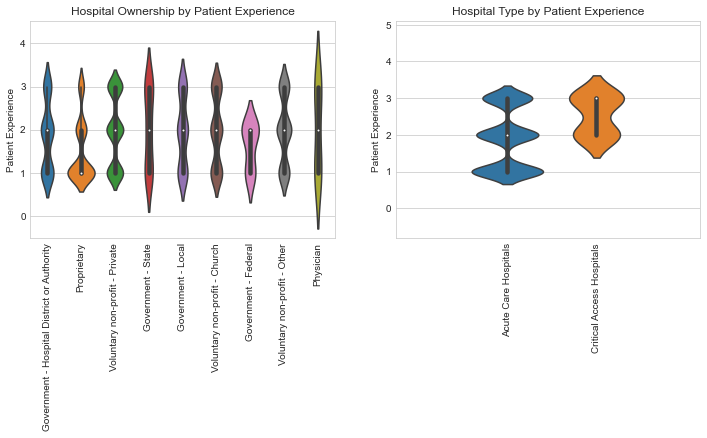

In [59]:
#  Hospital Ownership and Type & Patient Experience

fig = plt.figure(figsize = [12,4])

ax1= fig.add_subplot(1,2,1)
sns.violinplot(x = 'Hospital_Ownership', y = 'Patient_experience', showmeans = True, meanline = True, notch = True, showbox = True, data = df)
ax1.set_ylabel('Patient Experience')
ax1.set_xlabel('')
plt.xticks(rotation = 90)
ax1.set_title('Hospital Ownership by Patient Experience')

ax2= fig.add_subplot(1,2,2)
sns.violinplot(x = 'Hospital_Type', y = 'Patient_experience', showmeans = True, meanline = True, notch = True, showbox = True, data = df)
ax2.set_ylabel('Patient Experience')
ax2.set_xlabel('')
plt.xticks(rotation = 450)
ax2.set_title('Hospital Type by Patient Experience')
plt.margins(0.5)

plt.savefig('Fig5.png', dpi=300)
print('Figure 3. Patient Experience by Hospital Ownership Model and Hospital Type')
sns.set_style("whitegrid")
plt.show()

Figure 4. Distributions of Numeric Medicare Data


<Figure size 460.8x345.6 with 0 Axes>

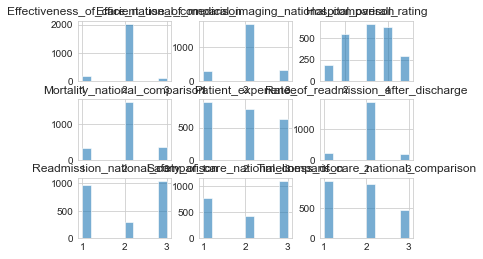

In [60]:
# Histogram of numeric features

df1 = df.iloc[:,5:14]
fig = plt.figure(figsize = [6.4,4.8])
df1.hist(alpha=0.6)
print('Figure 4. Distributions of Numeric Medicare Data')
plt.savefig('Fig6.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

Figure 5. Distributions of Numeric Medicare Data


<Figure size 460.8x345.6 with 0 Axes>

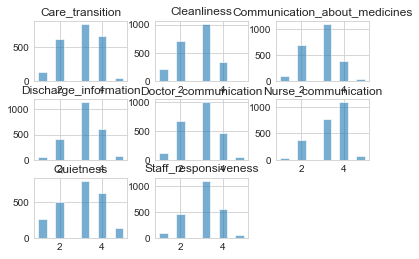

In [61]:
df2 = df.iloc[:,18:26]
fig = plt.figure(figsize = [6.4,4.8])
df2.hist(alpha=0.6)
print('Figure 5. Distributions of Numeric Medicare Data')
plt.savefig('Fig11.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

## Machine Learning Prepartion
Split dataset to training, testing, and validation.

In [25]:
df['Hospital_Type']= df['Hospital_Type'].map({'Acute Care Hospitals':0,'Critical Access Hospitals':1})
df['Hospital_Ownership']= df['Hospital_Ownership'].map({'Government - Hospital District or Authority':0,'Proprietary':1,'Voluntary non-profit - Private':2,'Government - State':3,'Voluntary non-profit - Other':4,'Government - Local':5,'Voluntary non-profit - Church':6,'Government - Local':7,'Government - Federal':8})
df['Emergency_Services']= df['Emergency_Services'].map({'Yes':0,'No':1})
df = df.dropna()
X = df.iloc[:, [2,3,4,5,6,7,8,10,11,12,13,18,19,20,21,22,23,24,25]]
y = df.iloc[:, 9]
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [26]:
# Partition the dataset into training (50%), validation (30%), and test sets (20%) by using scikit-learn
X_train, X_v, y_train, y_v = train_test_split(X, y, test_size=0.5, random_state=1)
X_valid,X_test, y_valid, y_test  = train_test_split(X_v, y_v, test_size=0.4, random_state=1)
print('Training   : ', X_train.shape)
print('Validation : ', X_valid.shape)
print('Test       : ', X_test.shape)

Training   :  (1149, 19)
Validation :  (690, 19)
Test       :  (460, 19)


# Machine Learning Models
The supervised learning models tested on this dataset include:
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA) - for classification
3. K-nearest Neighbors (KNN)
4. Decision Tree (DTC)
5. Random Forest (RFC)
6. Support Vector Machine (SVM)
7. Multinomial Naive Bayes (NB)

In [27]:
# Prepare lists of algorithms to be used.

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', MultinomialNB()))

In [28]:
# Create loop to serially evaluate models using kfold and cross validation then print performance accuracy.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm \n")

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold= KFold(n_splits = 5, random_state=2, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mod = model
    mod.fit(X_train, y_train)
    mod_pred = mod.predict(X_test)
    mod_accuracy = accuracy_score(mod_pred, y_test)
    mod_rmse = (mse(mod_pred, y_test)**1/2)
    mod_valid = mod.predict(X_valid)
    mod_accuracy1 = accuracy_score(mod_valid, y_valid)
    mod_rmse1 = (mse(mod_valid, y_valid)**1/2)
    msg = "CV Accuracy %s: %f SD %f - Test Accuracy: %f RMSE: %f- Validation Accuracy: %f RMSE: %f" % (name, cv_results.mean(), cv_results.std(),mod_accuracy, mod_rmse,mod_accuracy1, mod_rmse1)
    print(msg)

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm 

CV Accuracy LR: 0.699757 SD 0.029054 - Test Accuracy: 0.669565 RMSE: 0.181522- Validation Accuracy: 0.707246 RMSE: 0.165942
CV Accuracy LDA: 0.704986 SD 0.024690 - Test Accuracy: 0.654348 RMSE: 0.185870- Validation Accuracy: 0.701449 RMSE: 0.160145
CV Accuracy KNN: 0.676207 SD 0.034974 - Test Accuracy: 0.628261 RMSE: 0.221739- Validation Accuracy: 0.647826 RMSE: 0.210870
CV Accuracy DTC: 0.650104 SD 0.025966 - Test Accuracy: 0.582609 RMSE: 0.267391- Validation Accuracy: 0.623188 RMSE: 0.216667
CV Accuracy RFC: 0.731954 SD 0.030831 - Test Accuracy: 0.676087 RMSE: 0.171739- Validation Accuracy: 0.689855 RMSE: 0.168116
CV Accuracy SVM: 0.710211 SD 0.027314 - Test Accuracy: 0.663043 RMSE: 0.181522- Validation Accuracy: 0.691304 RMSE: 0.171739
CV Accuracy NB: 0.598762 SD 0.032010 - Test Accuracy: 0.532609 RMSE: 0.266304- Validation Accuracy: 0.540580 RMSE: 0.264493


#### Test Machine Learning Model Performance After Parameter Optimization
Parameter optimization can be done by serially testing different parameter combinations using SciKit Learn's GridSearchCV method. This allows one identify parameters that perform best by a particular metric (e.g. accuracy). For example, one can test the kernal type (i.e. 'linear' or 'rbf') for SVM, or the number of neighbors to use when making predictive decisions with KNN and how KNN should calculate distances between neighbors (e.g. minkowski, Manhattan, etc.).

In [29]:
# Define parameters optimization with GridSearchCV.  

# SVM_params = {'C':[0.1, 10, 100], 'kernel':['rbf' ,'linear']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3],}
KNN_params = {'n_neighbors':[1,5,10,20], 'p':[2]}
RF_params = {'n_estimators':[10,50,100]}
# DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100]}
# NB_mult_params = {'alpha':[1,10]}

In [30]:
# Make list of models to test with paramter dictionaries.  

models_opt = []
models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
# models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
# models_opt.append(('SVM', SVC(), SVM_params))
# models_opt.append(('NB', MultinomialNB(), NB_mult_params))

In [31]:
# Serially evaluate models with GridSearchCV using defined parameters and print performance as accuracies with SDs.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After Serial Optimization \n")

results_params = []
names_params = []
scoring = 'accuracy'
for name, model, params in models_opt:
    kfold= KFold(n_splits = 5, random_state=2, shuffle=True)
    model_grid = GridSearchCV(model, params)
    cv_results_params = cross_val_score(model_grid, X_train, y_train, cv=kfold, scoring=scoring)
    results_params.append(cv_results_params)
    names_params.append(name)
    msg = "CV Accuracy %s: %f (%f)" % (name, cv_results_params.mean(), cv_results_params.std())
    print(msg)

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After Serial Optimization 

CV Accuracy LR: 0.702377 (0.027451)
CV Accuracy LDA: 0.704986 (0.024690)
CV Accuracy KNN: 0.684067 (0.036073)
CV Accuracy RFC: 0.724997 (0.036179)


* Quick Summary of Default Algorithm Performance and Parameter Optimization

It looks like we are able to predict patient experience with about 70% accuracy, Parameter optimization did not make a sizeable difference in performance but did tend to decrease the variance in accuracy.

## Dimension Reduction
* Principle component analysis (PCA) 
is a form a dimensional reduction that can be used to reduce the feature number of a dataset. PCA identifies a given number of 'principle component' (e.g. via eigenevalue decomposition of data covariance) on a dataset.
* Linear discriminant analysis (LDA) 
is conceptually similar to PCA in that it reduces the dimensions of the data. However, LDA finds linear combinations of variables that best explain data while taking into account the differences between data classifications/labels.

The following section will evaluate dimensional reduction as a convenient tool to visualize data in a lower dimension and as a method of data preprocessing to improve algorithm performance.

In [62]:
# First, visualize data when reduced to 3 components for 3D visualizpca_3d = PCA(n_components = 3)

pca_3d= PCA(n_components = 3)

X_train_pca_3d = pca_3d.fit(X_train)
X_train_pca_3d = pca_3d.transform(X_train)
pca_df = pd.DataFrame(X_train_pca_3d)

pca_df['PCA1'] = X_train_pca_3d[:,0]
pca_df['PCA2'] = X_train_pca_3d[:,1]
pca_df['PCA3'] = X_train_pca_3d[:,2]
pca_df['labels'] = y_train.values

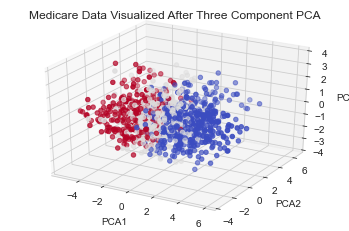

In [65]:
threedee_pca = plt.figure().gca(projection = '3d')
threedee_pca.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c = pca_df['labels'], cmap=cm.coolwarm)
threedee_pca.set_xlabel('PCA1')
threedee_pca.set_ylabel('PCA2')
threedee_pca.set_zlabel('PCA3')
threedee_pca.set_title('Medicare Data Visualized After Three Component PCA')
plt.savefig('Fig22.png', dpi=300)
plt.show()

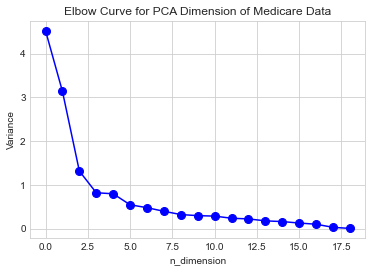

In [66]:
# Next, use an elbow curve of explained variance to identify the optimal number of components for machine learning.
pca = PCA()

pca_elbow = pca.fit(X_train)

variance = pca_elbow.explained_variance_[:20]
plt.plot(variance, 'bo-', markersize=8)
plt.xlabel("n_dimension")
plt.ylabel("Variance")
plt.title("Elbow Curve for PCA Dimension of Medicare Data")
plt.savefig('Fig33.png', dpi=300)
plt.show()

In [67]:
# Instantiate a new PCA model with 13 components.
pca_preprocessing = PCA(n_components = 13)

In [68]:
# Apply PCA to training and test set (fit on test set).
X_train_pca = pca_preprocessing.fit(X_train)
X_train_pca = pca_preprocessing.transform(X_train)
X_test_pca = pca_preprocessing.transform(X_test)
X_valid_pca = pca_preprocessing.transform(X_valid)

In [69]:
# Make list of models to test with paramter dictionaries on data preprocessed with PCA.  

models_pca = []
models_pca.append(('LR', LogisticRegression()))
models_pca.append(('LDA', LinearDiscriminantAnalysis()))
models_pca.append(('KNN', KNeighborsClassifier()))
models_pca.append(('DTC', DecisionTreeClassifier()))
models_pca.append(('RFC', RandomForestClassifier()))
models_pca.append(('SVM', SVC()))
#models_opt.append(('NB', MultinomialNB(), NB_mult_params))

In [70]:
# Create loop to serially evaluate models using kfold and cross validation then print performance accuracy.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After PCA Dimensional Reduction \n")

results_pca = []
names_pca = []
scoring = 'accuracy'

for name, model in models_pca:
    kfold= KFold(n_splits = 5, random_state=2, shuffle=True)
    cv_results_pca = cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
    results_pca.append(cv_results_pca)
    names_pca.append(name)
    mod = model
    mod.fit(X_train_pca, y_train)
    mod_pred = mod.predict(X_test_pca)
    mod_accuracy = accuracy_score(mod_pred, y_test)
    mod_rmse = (mse(mod_pred, y_test)**1/2)
    mod_accuracy1 = accuracy_score(mod_valid, y_valid)
    mod_rmse1 = (mse(mod_valid, y_valid)**1/2)
    msg = "CV Accuracy %s: %f SD %f - Test Accuracy: %f RMSE: %f- Validation Accuracy: %f RMSE: %f" % (name, cv_results.mean(), cv_results.std(),mod_accuracy, mod_rmse,mod_accuracy1, mod_rmse1)
    print(msg)

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After PCA Dimensional Reduction 

CV Accuracy LR: 0.598762 SD 0.032010 - Test Accuracy: 0.658696 RMSE: 0.186957- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy LDA: 0.598762 SD 0.032010 - Test Accuracy: 0.663043 RMSE: 0.184783- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy KNN: 0.598762 SD 0.032010 - Test Accuracy: 0.617391 RMSE: 0.240217- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy DTC: 0.598762 SD 0.032010 - Test Accuracy: 0.584783 RMSE: 0.295652- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy RFC: 0.598762 SD 0.032010 - Test Accuracy: 0.647826 RMSE: 0.195652- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy SVM: 0.598762 SD 0.032010 - Test Accuracy: 0.660870 RMSE: 0.185870- Validation Accuracy: 0.540580 RMSE: 0.264493


* Quick Summary of Default Algorithm Performance and Parameter Optimization After PCA

It looks like PCA reduced accuracy of all of our models and so will not be pursued further in this analysis.

In [71]:
# First, let's use LDA to reduce the dimensions of Medicare data and inspect this visually.

lda_2 = LinearDiscriminantAnalysis()

lda_df = lda_2.fit_transform(X_train, y_train)
lda_df = pd.DataFrame(lda_df, columns = ['LDA1','LDA2'] )
lda_df.head()

,LDA1,LDA2
0,1.001490,-0.354564
1,-1.115672,1.289683
2,0.687615,-1.154949
3,0.404943,0.563636
4,1.485721,-0.777217


In [72]:
# Append data frame with target data 
labels_train = y_train.copy()
labels_train = pd.DataFrame(labels_train)
labels_train.set_index(np.arange(0,1149,1))
lda_df['Patient Satifaction'] = labels_train['Patient_experience'].values

Figure 6. Visualizing Medicare Date with LDA


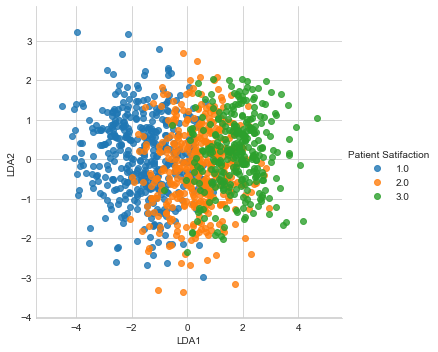

In [73]:
# Plot LDA data 

sns.lmplot("LDA1", "LDA2", data=lda_df, hue='Patient Satifaction', fit_reg=False)
plt.margins(.1)

print('Figure 6. Visualizing Medicare Date with LDA')
plt.savefig('Fig8.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

* Quick Summary of LDA Visualization¶

It's fairly clear that LDA attempted to linearize data along three classification vectors (seen in blue, green, and red). However, there is substantial overlap between these three classes, which may make predicting patient experience with data clustered toward the center of this plot difficult.

#### Test Machine Learning with Cross Validation After LDA Dimensional Reduction

In [74]:
# Use LDA to reduce dimensions of data set.

lda_prep = LinearDiscriminantAnalysis()

X_train_lda = X_train.copy()
X_test_lda = X_test.copy()
X_valid_lda = X_valid.copy()

lda_prep.fit(X_train_lda, y_train)
X_train_lda = lda_prep.transform(X_train_lda)
X_test_lda = lda_prep.transform(X_test_lda)
X_valid_lda = lda_prep.transform(X_valid_lda)

In [75]:
# Make list of models to test with paramter dictionaries on data preprocessed with LDA.  

models_lda = []
models_lda.append(('LR', LogisticRegression()))
models_lda.append(('LDA', LinearDiscriminantAnalysis()))
models_lda.append(('KNN', KNeighborsClassifier()))
models_lda.append(('DTC', DecisionTreeClassifier()))
models_lda.append(('RFC', RandomForestClassifier()))
models_lda.append(('SVM', SVC()))
#models_opt.append(('NB', MultinomialNB(), NB_mult_params))

In [76]:
# Create loop to serially evaluate models using kfold and cross validation then print performance accuracy.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After LDA Dimensional Reduction \n")

results_lda = []
names_lda = []
scoring = 'accuracy'

for name, model in models_lda:
    kfold= KFold(n_splits = 5, random_state=2, shuffle=True)
    cv_results_lda = cross_val_score(model, X_train_lda, y_train, cv=kfold, scoring=scoring)
    results_lda.append(cv_results_lda)
    names_lda.append(name)
    mod = model
    mod.fit(X_train_lda, y_train)
    mod_pred = mod.predict(X_test_lda)
    mod_accuracy = accuracy_score(mod_pred, y_test)
    mod_rmse = (mse(mod_pred, y_test)**1/2)
    mod_accuracy1 = accuracy_score(mod_valid, y_valid)
    mod_rmse1 = (mse(mod_valid, y_valid)**1/2)
    msg = "CV Accuracy %s: %f SD %f - Test Accuracy: %f RMSE: %f- Validation Accuracy: %f RMSE: %f" % (name, cv_results.mean(), cv_results.std(),mod_accuracy, mod_rmse,mod_accuracy1, mod_rmse1)
    print(msg)

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After LDA Dimensional Reduction 

CV Accuracy LR: 0.598762 SD 0.032010 - Test Accuracy: 0.665217 RMSE: 0.180435- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy LDA: 0.598762 SD 0.032010 - Test Accuracy: 0.654348 RMSE: 0.185870- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy KNN: 0.598762 SD 0.032010 - Test Accuracy: 0.669565 RMSE: 0.194565- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy DTC: 0.598762 SD 0.032010 - Test Accuracy: 0.589130 RMSE: 0.251087- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy RFC: 0.598762 SD 0.032010 - Test Accuracy: 0.626087 RMSE: 0.216304- Validation Accuracy: 0.540580 RMSE: 0.264493
CV Accuracy SVM: 0.598762 SD 0.032010 - Test Accuracy: 0.652174 RMSE: 0.186957- Validation Accuracy: 0.540580 RMSE: 0.264493


## Variable Importance
From the variable importance, we can see the top 5 features for patience experience, they are: Care_transition,Nurse_communication, Hospital_overall_rating ,Doctor_communication, Quiteness. Then we would know that communication and response is crucial for patient satisfaction.

In [77]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00144786 0.05670002 0.00917024 0.09008205 0.03605811 0.04156668
 0.03761569 0.02087775 0.0430175  0.03859793 0.02518169 0.13621988
 0.05745651 0.05641812 0.05192504 0.06933691 0.0917667  0.06778843
 0.0687729 ]


In [78]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False)

Care_transition                                         0.136220
Nurse_communication                                     0.091767
Hospital_overall_rating                                 0.090082
Doctor_communication                                    0.069337
Staff_responsiveness                                    0.068773
Quietness                                               0.067788
Cleanliness                                             0.057457
Hospital_Ownership                                      0.056700
Communication_about_medicines                           0.056418
Discharge_information                                   0.051925
Timeliness_of_care_national_comparison                  0.043018
Safety_of_care_national_comparison                      0.041567
Efficient_use_of_medical_imaging_national_comparison    0.038598
Readmission_national_comparison                         0.037616
Mortality_national_comparison                           0.036058
Rate_of_readmission_after

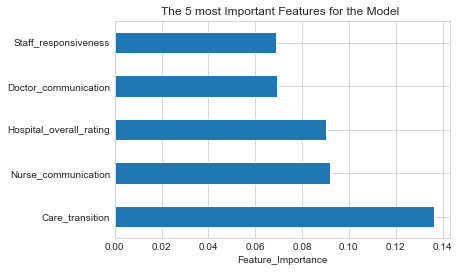

In [89]:
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Feature_Importance")
plt.title("The 5 most Important Features for the Model ")
plt.savefig('Fig66.png', dpi=None)
plt.show()

# Ensemble Modeling to Predict Patient Experience: Boosting and Bagging Methods
Boosting is an ensemble machine learning approaches that can combine multiple "weak" learners to improve performance.

Bagging (bootstrap aggregation) is an ensemble machine learning approaches that can combine uses boostraping/resampling to improve performance.

In [90]:
print("Table X. Accuracy of Patient Experience Predictions using Ensemble Learning \n")

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results_ensembles = []
names_ensembles = []
for name, model in ensembles:
  kfold = KFold(n_splits = 5, random_state=2, shuffle=True)
  cv_results_ensembles = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results_ensembles.append(cv_results_ensembles)
  names_ensembles.append(name)
  msg = "%s: %f (%f)" % (name, cv_results_ensembles.mean(), cv_results_ensembles.std())
  print(msg)

Table X. Accuracy of Patient Experience Predictions using Ensemble Learning 

AB: 0.689326 (0.023222)
GBM: 0.717152 (0.036114)
RF: 0.727591 (0.021383)
ET: 0.724986 (0.039260)


In [91]:
# Ensemble Voting

from sklearn.ensemble import VotingClassifier

kfold= KFold(n_splits = 5, random_state=2, shuffle=True)

estimators = []

model1 = LogisticRegression()
estimators.append(("logistic", model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart", model2))
model3 = SVC()
estimators.append(("svm", model3))
model4 = KNeighborsClassifier()
estimators.append(("KNN", model4))
model5 = RandomForestClassifier()
estimators.append(("RFC", model5))
model6 = MultinomialNB()
estimators.append(("NB", model6))


voting = VotingClassifier(estimators)
results_voting = cross_val_score(voting, X_train, y_train, cv=kfold)

results_ensembles.append(results_voting)
names_ensembles.append('Voting')

print(results_voting.mean())

0.7241237896335676


* Quick Summary of Ensemble Learning

It looks like ensemble learning performed fairly well with an accuracy of 73% in predicting patient experience using Random Forest Classifier.

In [ ]:
# Visualize model performances before and after paramater optomization and LDA preprocessing.

fig = plt.figure()

ax1 = fig.add_subplot(1,5,1)
ax1.boxplot(results)
ax1.set_ylim([0.50,0.80])
ax1.set_title('Default')
ax1.set_ylabel('Accuracy')
ax1.set_xticklabels(names)
plt.xticks(rotation = 90)

ax2 = fig.add_subplot(1,5,2)
ax2.boxplot(results_params)
ax2.set_ylim([0.50,0.80])
ax2.set_title('Optomized ')
ax2.set_xticklabels(names_params)
plt.xticks(rotation = 90)

ax3 = fig.add_subplot(1,5,3)
ax3.boxplot(results_lda)
ax3.set_ylim([.50,.80])
ax3.set_xticklabels(names_lda)
ax3.set_title('Default + LDA')
plt.xticks(rotation = 90)

ax4 = fig.add_subplot(1,5,4)
ax4.boxplot(results_ensembles)
ax4.set_ylim([0.50,.80])
ax4.set_title('Ensemble')
ax4.set_xticklabels(names_ensembles)
plt.xticks(rotation = 90)
sns.set_style("whitegrid")
#plt.yticks("")

print('Figure 7. Predictive Modeling of Patient Experience during Cross Validation')
plt.savefig('Fig9.png', dpi=300)
plt.show()

## Conclusion